# Iniciando a zebralib

In [43]:
#Equipe Zebra aerodesign UNESP_FEIS
# __Version__ : 0.0.1
# __Release__: Arthur Chabole 13/05/21

- GitHub da equipe zebra: https://github.com/Zebra-Aerodesign
- Meu GitHub com ajudas e códigos: https://github.com/Chabole 
- Críticas e sugestões: arthur.chabole@unesp.br

## Configurando o git e o github

1. Baixe o git em https://git-scm.com/
2. Crie uma conta no Github em https://github.com
3. Baixe o Github desktop em https://github.com
4. Dúvidas sobre Github assista a playlist do prof. Gustavo Guanabara 
https://shorturl.at/rNSZ2


## Configurando a biblioteca zebralib

1. https://github.com/Zebra-Aerodesign/ZebraLib
2. Clone o repositório do Github no seu computador em C:\Users\\....\Anaconda3
3. Vá em C:\Users\arthu\Anaconda3\Lib\site-packages
4. Crie um arquivo no bloco de notas chamado ZebraLib.pth e salve na pasta site-packages
5. Dentro do arquivo coloque o local onde está a biblioteca exemplo: C:\Users\arthu\Anaconda3\ZebraLib
6. Sucesso! Agora é só importar a biblioteca no seu código e se divertir ... :)

# Entender mais sobre programação básica e avançada

## Canal curso em video prof. gustavo guanabara link das playlist

1. Curso de algorimos e lógica de programação: https://youtu.be/8mei6uVttho 
2. Programação em python mundo 1: https://youtu.be/S9uPNppGsGo
3. Programação em python mundo 2: https://youtu.be/nJkVHusJp6E
4. Programação em python mundo 3: https://youtube.com/playlist?list=PLHz_AreHm4dksnH2jVTIVNviIMBVYyFnH
5. Programação em python exercícios: https://youtube.com/playlist?list=PLHz_AreHm4dm6wYOIW20Nyg12TAjmMGT-
6. Conceitos de Prog. orientada a objeto (assistir aulas em vermelho): https://youtu.be/KlIL63MeyMY


In [2]:
from ZebraLib.zebralib import zebraperformance as zp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
avião = zp.Airplane('Aviãozinho', Swet=5)

In [9]:
#Mostrando o nome do avião
avião.name

'Aviãozinho'

In [6]:
#Mostrando area da asa
avião.S

0.896

In [5]:
#Mostrando envergadura
avião.b

2.08

In [60]:
print(avião.__repr__())
print(avião)

Nome= Aviãozinho, W=85.0, S=0.896, b=2.08, C_D0=0.07979910714285714, Clmáx=1.8
Nome: Aviãozinho, T/W=0.119, W/S=94.87, (L/D)max=6.135


In [61]:
#Calculando a tração dada uma velocidade
avião.trac_Available(5)

38.5875

## Plotando trações e potências para 1 avião 

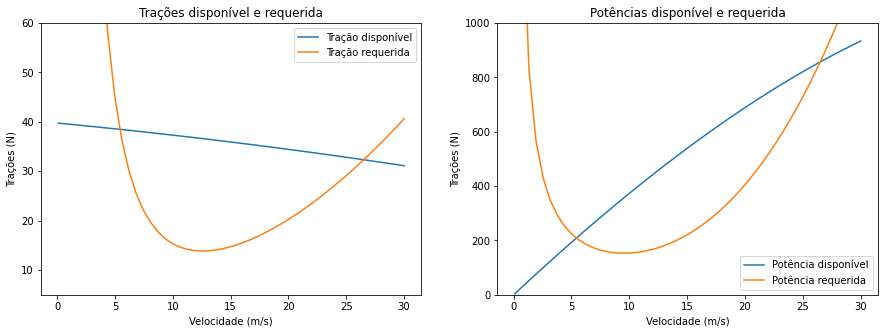

In [107]:
#Vetor de velocidades
V = np.linspace(0.1, 30)

#Calculando as trações
Trac_disp = avião.trac_Available(V)
Trac_req = avião.trac_Req(V)

#Calculando as Potências
Pot_disp = avião.pot_Available(V)
Pot_req = avião.pot_Req(V)

#Criando o objeto ax (gráfico) com 2 subplots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))

#Subplot 1
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax.plot(V, Trac_disp, label='Tração disponível')
ax.plot(V, Trac_req, label='Tração requerida')

ax.set_ylim(5,60)
ax.legend()

#Subplot 2
ax2.set(title='Potências disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.plot(V, Pot_disp, label='Potência disponível')
ax2.plot(V, Pot_req, label='Potência requerida')

ax2.set_ylim(0,1000)
ax2.legend()

## Plotando trações e potências para atmosferas diferentes 

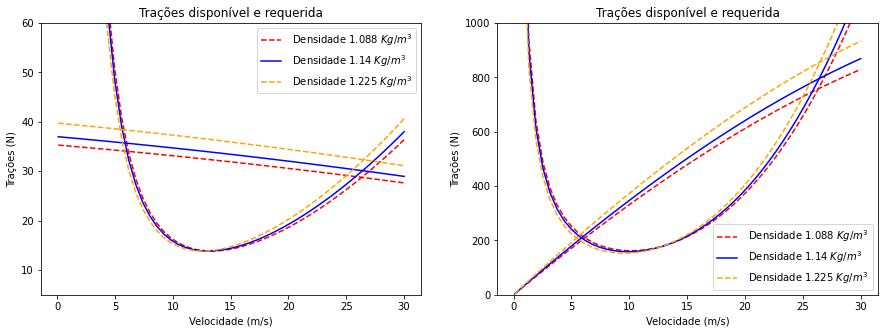

In [105]:
#Vetor de velocidade e densidades 
V = np.linspace(0.1, 30)
densidades = np.array((1.088, 1.14, 1.225))

#Colocar estilos no gráfico
Cores = np.array(('red', 'blue', 'orange'))
Lines = np.array(('--','-','--'))

#Criando o objeto ax (gráfico) com 2 subplots 
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')

#iterando para cada avião, cor e line
for dens, cor, line  in zip(densidades, Cores, Lines):
    
    #Construir a linha do subplot 1 - Trações
    ax.plot(V, avião.trac_Available(V, rho=dens), color=cor, ls=line)
    ax.plot(V, avião.trac_Req(V, rho=dens), color=cor, ls=line, label=f' Densidade {dens} $Kg/m^3$')
    
    #Construir a linha do subplot 2 - Potências
    ax2.plot(V, avião.pot_Available(V, rho=dens), color=cor, ls=line,)
    ax2.plot(V, avião.pot_Req(V, rho=dens), color=cor, ls=line,  label=f' Densidade {dens} $Kg/m^3$')

ax.set_ylim(5,60)
ax2.set_ylim(0,1000)

ax.legend()
ax2.legend()


##  Plotando trações e potências para aviões diferentes   

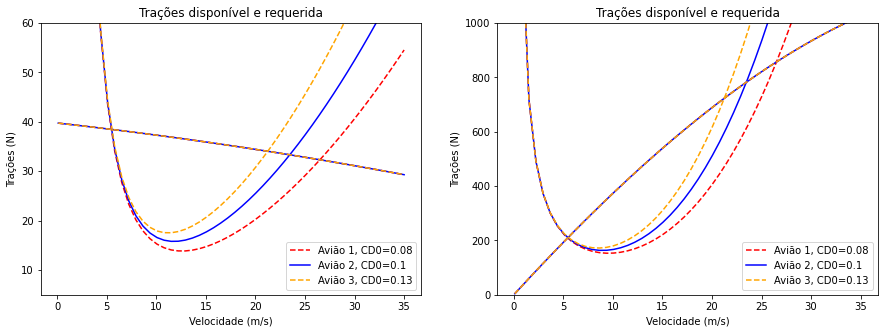

In [122]:
#Instanciando vários objetos do tipo Airplane
Avião_1 = zp.Airplane('Avião 1', Swet=10)
Avião_2 = zp.Airplane('Avião 2',Swet=13)
Avião_3 = zp.Airplane('Avião 3',Swet=16)
Avião_4 = zp.Airplane('Avião 4',Swet=18)

#Criando uma array de objetos pra iteração
Aviões = np.array((Avião_1, Avião_2, Avião_3, Avião_4))

V = np.linspace(0.1, 35)

Cores = np.array(('red', 'blue', 'orange'))
Lines = np.array(('--','-','--'))

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')
ax2.set(title='Trações disponível e requerida', xlabel='Velocidade (m/s)', ylabel='Trações (N)')

#Calculando as trações e potências para cada avião da array
for cor, line, Zb  in zip(Cores, Lines, Aviões):
    
    ax.plot(V, Zb.trac_Available(V, rho=dens), color=cor, ls=line)
    ax.plot(V, Zb.trac_Req(V, rho=dens), color=cor, ls=line, label=f'{Zb.name}, CD0={round(Zb.C_D0,2)}')
    
    ax2.plot(V, Zb.pot_Available(V, rho=dens), color=cor, ls=line,)
    ax2.plot(V, Zb.pot_Req(V, rho=dens), color=cor, ls=line,  label=f'{Zb.name}, CD0={round(Zb.C_D0,2)}')


ax.set_ylim(5,60)
ax2.set_ylim(0,1000)
ax.legend()
ax2.legend()